In [4]:
import pandas as pd

# Load each dataset
accelerometer_train = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/Train/Accelerometer.csv')
gyroscope_train = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/Train/Gyroscope.csv')
linear_accelerometer_train = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/Train/Linear Accelerometer.csv')
location_train = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/Train/Location.csv')


In [5]:
# Example for the Accelerometer data
print(accelerometer_train.head())
print(accelerometer_train.describe())
print(accelerometer_train.isnull().sum())


   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0 -0.001330   5.633535   0.079485   7.956405
1  0.008609   5.773793   0.002694   8.111482
2  0.018548   5.638624  -0.028441   8.342901
3  0.028487   5.552254   0.168400   8.164173
4  0.038426   5.545668   0.097896   7.807764
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  48078.000000  48078.000000  48078.000000  48078.000000
mean     238.913512     -1.166775      2.004235      9.434151
std      137.942263      1.015152      0.386375      0.339699
min       -0.001330     -3.562592    -10.594968      1.696422
25%      119.456105     -1.402434      1.955533      9.377699
50%      238.912112     -1.318458      2.016457      9.457483
75%      358.370333     -1.221011      2.141746      9.541309
max      477.833143     17.946630      4.648134     14.833104
Time (s)     0
X (m/s^2)    0
Y (m/s^2)    0
Z (m/s^2)    0
dtype: int64


In [6]:
# Apply a rolling mean with a window of 5 samples for smoothing
accelerometer_train['X (m/s^2)'] = accelerometer_train['X (m/s^2)'].rolling(window=5, min_periods=1).mean()
accelerometer_train['Y (m/s^2)'] = accelerometer_train['Y (m/s^2)'].rolling(window=5, min_periods=1).mean()
accelerometer_train['Z (m/s^2)'] = accelerometer_train['Z (m/s^2)'].rolling(window=5, min_periods=1).mean()


In [7]:
# Check the first few rows and summary statistics after smoothing
print(accelerometer_train.head())
print(accelerometer_train.describe())


   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0 -0.001330   5.633535   0.079485   7.956405
1  0.008609   5.703664   0.041090   8.033943
2  0.018548   5.681984   0.017913   8.136929
3  0.028487   5.649552   0.055535   8.143740
4  0.038426   5.628775   0.064007   8.076545
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  48078.000000  48078.000000  48078.000000  48078.000000
mean     238.913512     -1.166749      2.004234      9.434167
std      137.942263      1.008914      0.375754      0.324914
min       -0.001330     -2.277035     -6.680069      1.739383
25%      119.456105     -1.386200      1.966012      9.388806
50%      238.912112     -1.324655      2.006637      9.460956
75%      358.370333     -1.238135      2.138842      9.529873
max      477.833143     16.202128      2.758194     12.175082


In [8]:
from scipy import stats
import numpy as np

# Calculate Z-scores of the data
z_scores = np.abs(stats.zscore(accelerometer_train[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']]))
threshold = 3  # Common cutoff for outliers

# Filter out the outliers
accelerometer_train_clean = accelerometer_train[(z_scores < threshold).all(axis=1)]

# Check how much data remains after removing outliers
print(f"Original data points: {len(accelerometer_train)}, Cleaned data points: {len(accelerometer_train_clean)}")


Original data points: 48078, Cleaned data points: 46897


In [9]:
# Save the cleaned accelerometer data to a new CSV file
accelerometer_train_clean.to_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/Train/Accelerometer_Train_Cleaned.csv', index=False)


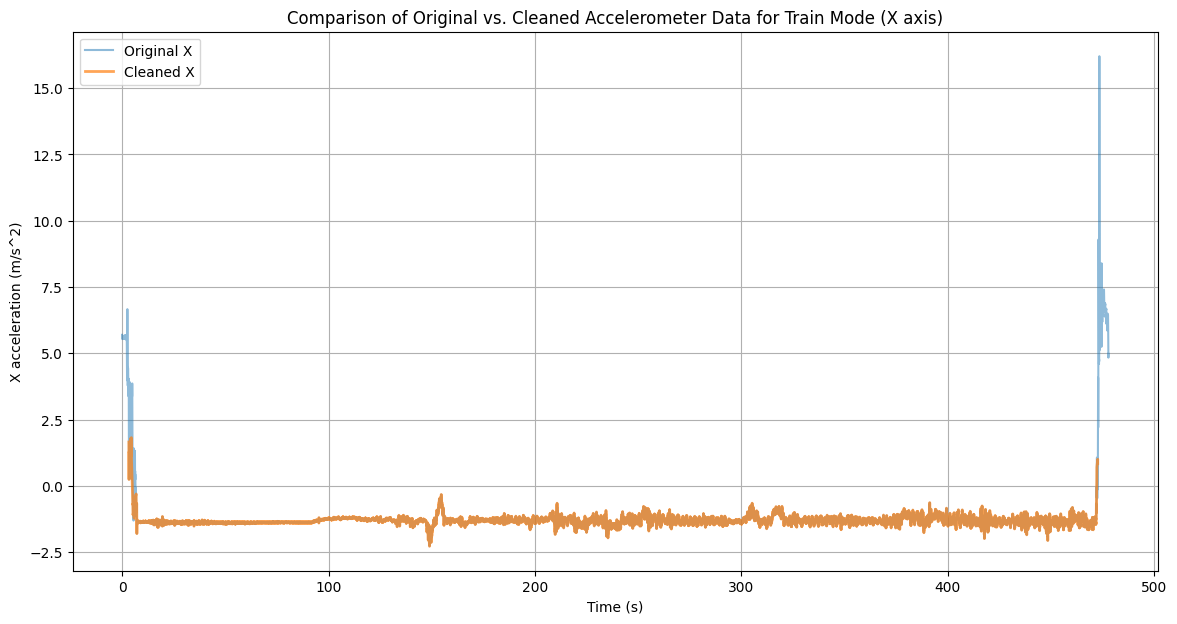

In [10]:
import matplotlib.pyplot as plt

# Make sure to load the original and cleaned data if not already loaded
# You might need to reload the original data if it has been altered during cleaning
# accelerometer_train = pd.read_csv('path_to_file/Accelerometer.csv')
# accelerometer_train_clean = pd.read_csv('Accelerometer_Train_Cleaned.csv')

plt.figure(figsize=(14, 7))  # Set the figure size as needed

# Original Data
plt.plot(accelerometer_train['Time (s)'], accelerometer_train['X (m/s^2)'], label='Original X', alpha=0.5)

# Cleaned Data
plt.plot(accelerometer_train_clean['Time (s)'], accelerometer_train_clean['X (m/s^2)'], label='Cleaned X', alpha=0.7, linewidth=2)

plt.title('Comparison of Original vs. Cleaned Accelerometer Data for Train Mode (X axis)')
plt.xlabel('Time (s)')
plt.ylabel('X acceleration (m/s^2)')
plt.legend()
plt.grid(True)

plt.show()
